# Introduction and Imports:

In [160]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import plotly.express as px
import warnings

In [161]:
# import dataset
train = pd.read_csv('./widsdatathon2022/train.csv')
test = pd.read_csv('./widsdatathon2022/test.csv')

In [162]:
# viewing top rows of data of train
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


### Filling out missing values:

In [163]:
def preprocess_data(data):
  for col in data.columns:
    if col not in ['State_Factor', 'building_class', 'facility_type']:
      data[col] = data[col].fillna(data[col].median())

### Dropping min and max columns:

In [164]:
train.drop(['january_min_temp', 'february_min_temp', 'march_min_temp', 'april_min_temp',
       'may_min_temp', 'june_min_temp', 'july_min_temp', 'august_min_temp', 'september_min_temp',
       'october_min_temp', 'november_min_temp','december_min_temp'], axis=1, inplace=True)

In [165]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,january_max_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,50.5,68,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,50.5,68,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,50.5,68,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,50.5,68,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,50.5,68,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [166]:
train.drop(['january_max_temp', 'february_max_temp', 'march_max_temp', 'april_max_temp',
       'may_max_temp', 'june_max_temp', 'july_max_temp', 'august_max_temp', 'september_max_temp',
       'october_max_temp', 'november_max_temp','december_max_temp'], axis=1, inplace=True)

In [167]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,50.5,50.589286,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,50.5,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,50.5,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,50.5,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,50.5,50.589286,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


## Checking out trend again:

C:\Users\ASUS\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



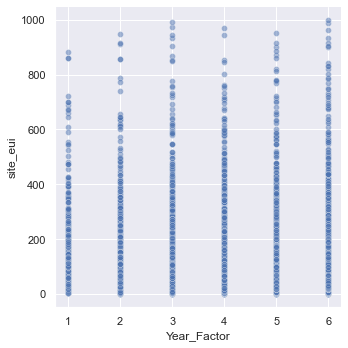

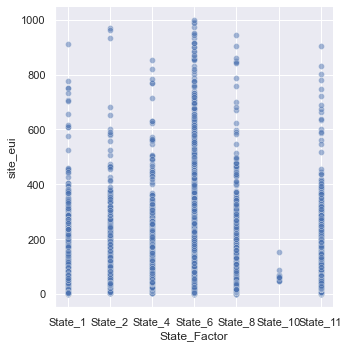

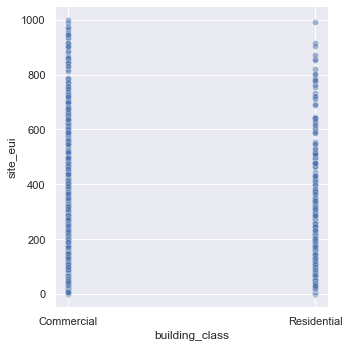

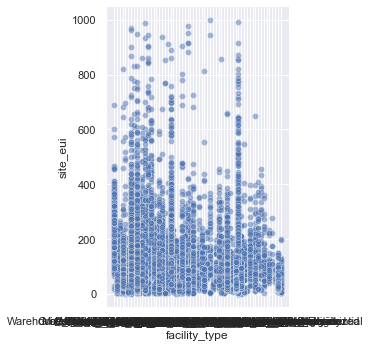

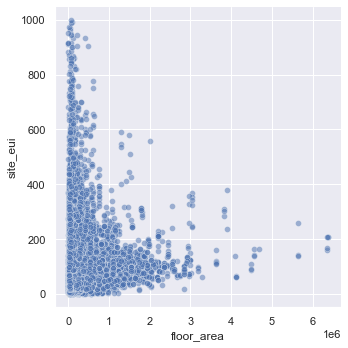

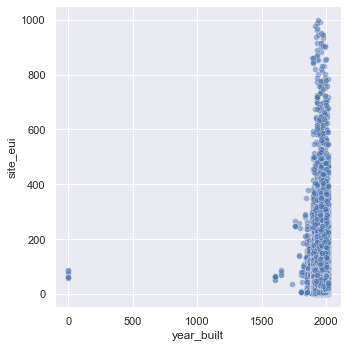

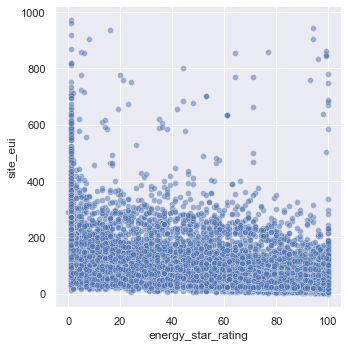

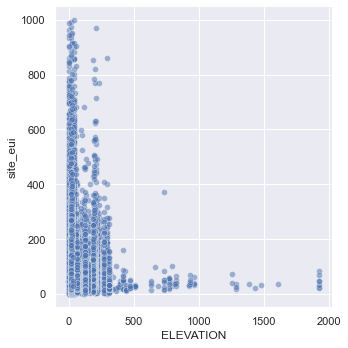

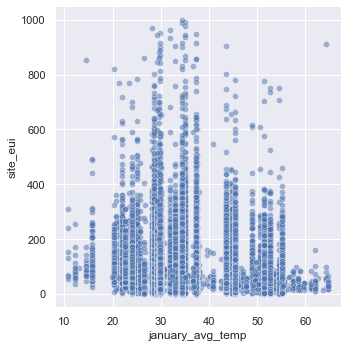

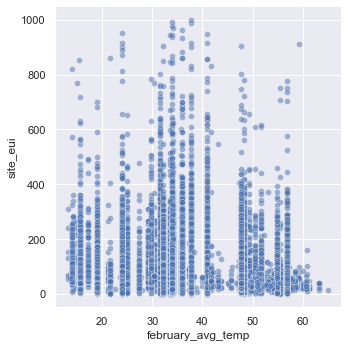

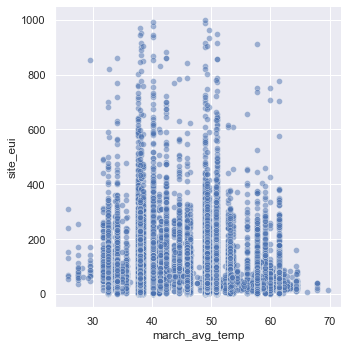

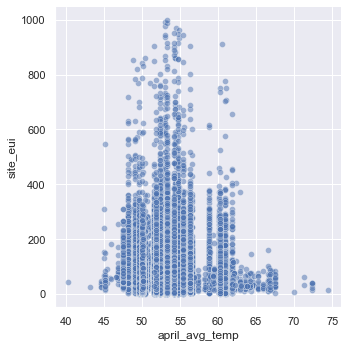

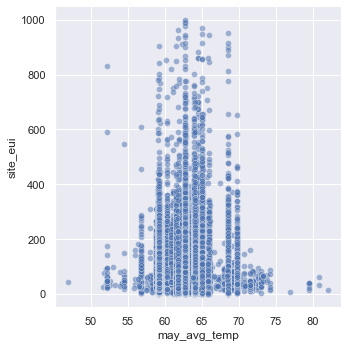

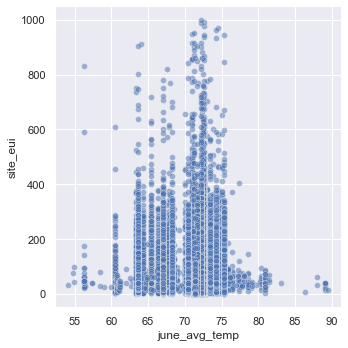

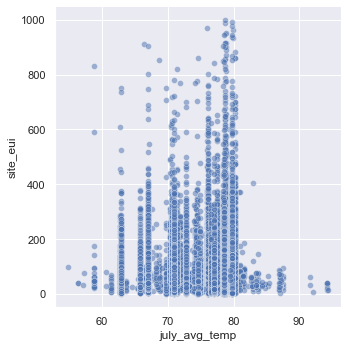

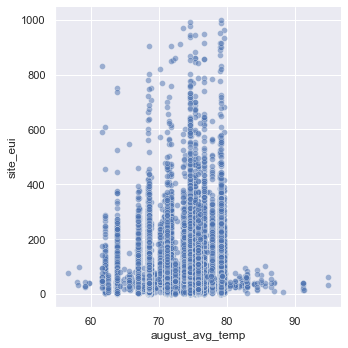

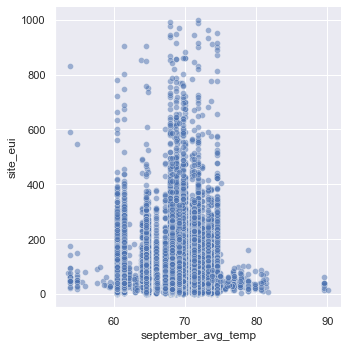

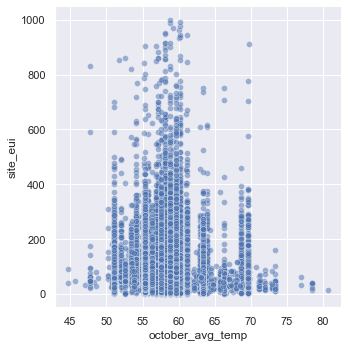

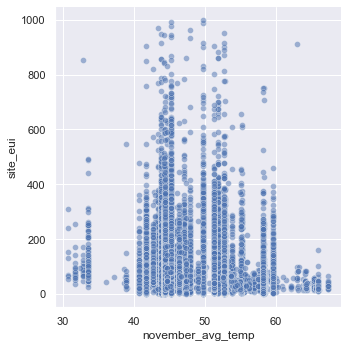

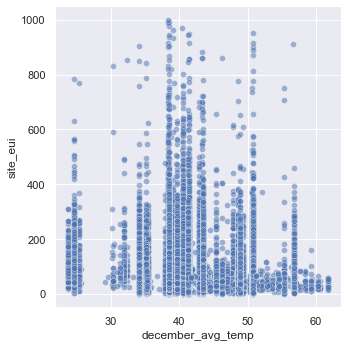

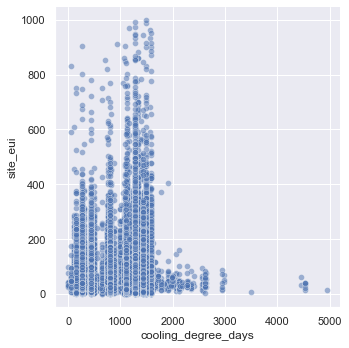

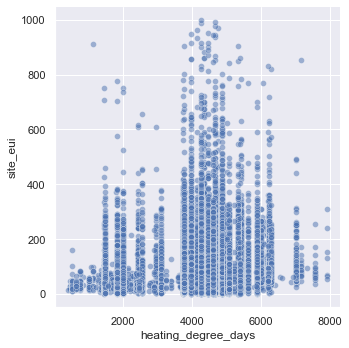

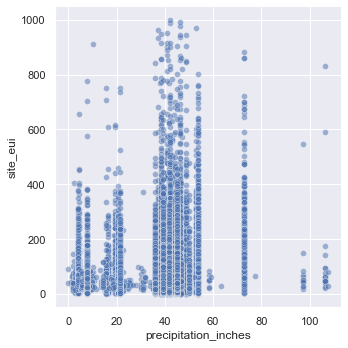

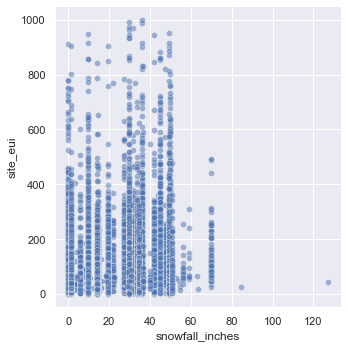

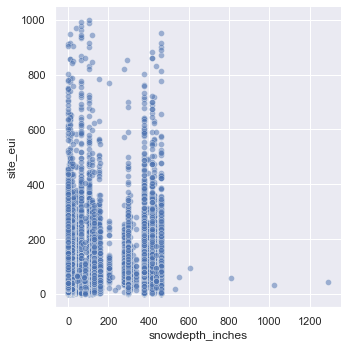

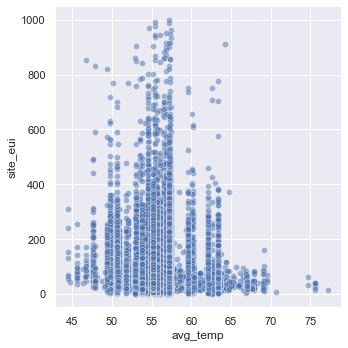

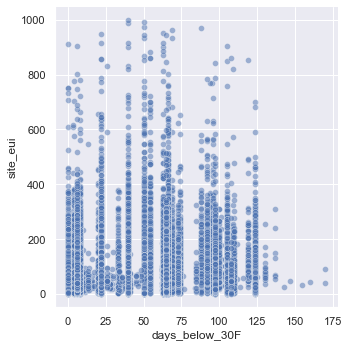

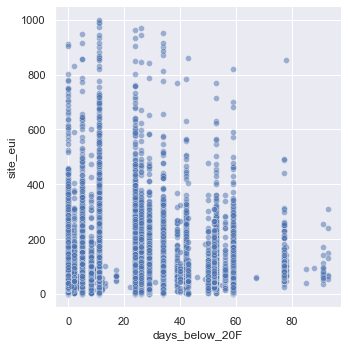

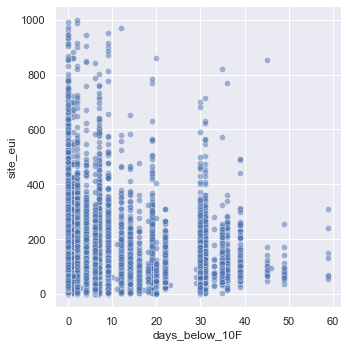

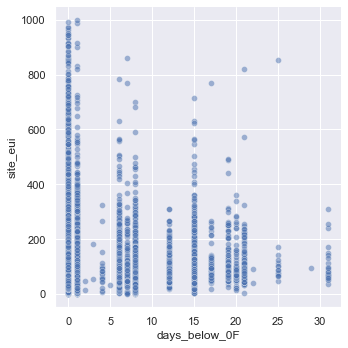

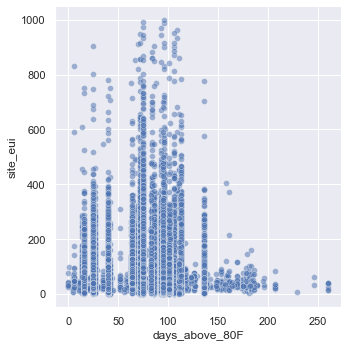

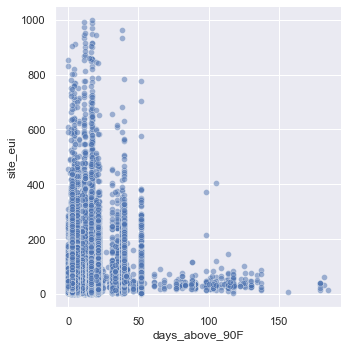

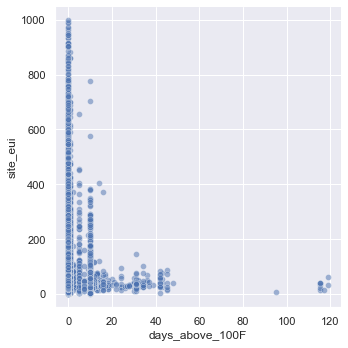

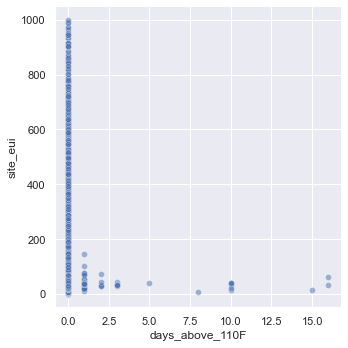

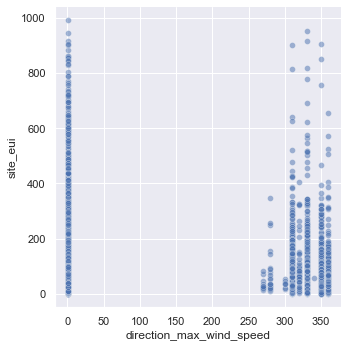

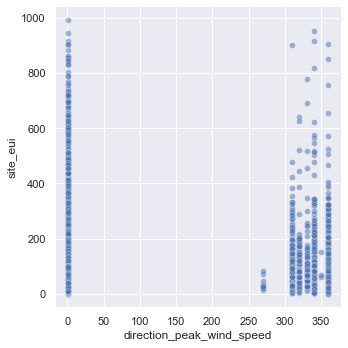

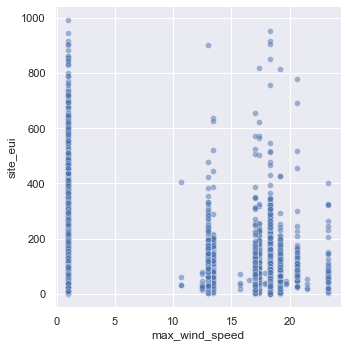

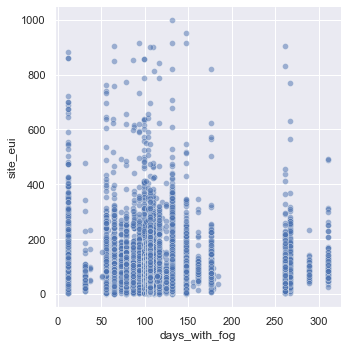

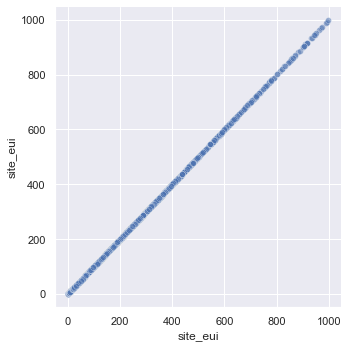

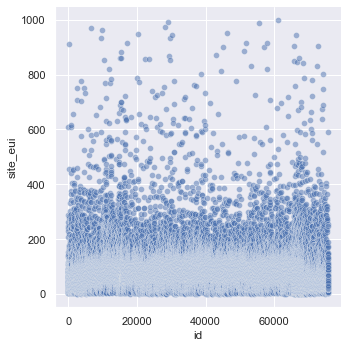

In [168]:
#looping through each column for visuali 
for (columnName, columnData) in train.iteritems():
    sns.relplot(data = train, x = columnName, y = 'site_eui', sizes=(10, 200), alpha = 0.5)

## Changing non numeric data to the numeric one:

### Changing the state_factor column:

In [169]:
from sklearn.preprocessing import OrdinalEncoder

In [170]:
enc = OrdinalEncoder()

### Transforming state-Factor and building_class:

In [171]:
# Deducing total categories and their names
print(train['building_class'].unique())
print(type(train['building_class'].unique()))

['Commercial' 'Residential']
<class 'numpy.ndarray'>


In [172]:
# Deducing total categories and their names
print(train['State_Factor'].unique())
print(type(train['State_Factor'].unique()))

['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']
<class 'numpy.ndarray'>


In [173]:
train['State_Factor'] = enc.fit_transform(train['State_Factor'].to_numpy().reshape(-1, 1))
train['building_class'] = enc.fit_transform(train['building_class'].to_numpy().reshape(-1, 1))

### One-hot-encoding the facility_type column

In [174]:
# Deducing total categories and their names
print(train['facility_type'].unique())
print(type(train['facility_type'].unique()))

['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Health_Care_Inpatient' 'Public_Assembly_Drama_theater'
 'Public_Assembly_Social_meeting' 'Religious_worship'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Parking_Garage' 'Commercial_Unknown'
 'Service_Vehicle_service_repair_shop' 'Service_Drycleaning_or_Laundry'
 'Public_Assembly_Recreation' 'Service_Uncategorized'
 'Warehouse_Refrigerated' 'Food_Service_Uncategorized'
 'Health_Care_Uncategorized' 'Food_Service_Other'
 'P

In [175]:
print(len(train['facility_type'].unique()))

60


In [176]:
encoded_data = pd.get_dummies(train, columns = ['facility_type'])
encoded_data

,Year_Factor,State_Factor,building_class,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,march_avg_temp,...,facility_type_Retail_Uncategorized,facility_type_Retail_Vehicle_dealership_showroom,facility_type_Service_Drycleaning_or_Laundry,facility_type_Service_Uncategorized,facility_type_Service_Vehicle_service_repair_shop,facility_type_Warehouse_Distribution_or_Shipping_center,facility_type_Warehouse_Nonrefrigerated,facility_type_Warehouse_Refrigerated,facility_type_Warehouse_Selfstorage,facility_type_Warehouse_Uncategorized
0,1,0.0,0.0,61242.0,1942.0,11.0,2.4,50.500000,50.589286,53.693548,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,274000.0,1955.0,45.0,1.8,50.500000,50.589286,53.693548,...,0,0,0,0,0,1,0,0,0,0
2,1,0.0,0.0,280025.0,1951.0,97.0,1.8,50.500000,50.589286,53.693548,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,0.0,55325.0,1980.0,46.0,1.8,50.500000,50.589286,53.693548,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,66000.0,1985.0,100.0,2.4,50.500000,50.589286,53.693548,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,2.0,0.0,20410.0,1995.0,8.0,36.6,43.451613,47.672414,49.354839,...,0,0,0,0,0,0,0,0,0,0
75753,6,2.0,1.0,40489.0,1910.0,98.0,36.6,43.451613,47.672414,49.354839,...,0,0,0,0,0,0,0,0,0,0
75754,6,2.0,0.0,28072.0,1917.0,NaN,36.6,36.612903,41.637931,41.338710,...,0,0,0,0,0,0,0,0,0,0
75755,6,2.0,0.0,53575.0,2012.0,NaN,36.6,36.612903,41.637931,41.338710,...,0,0,0,0,0,0,0,0,0,0


### Dropping the last column:

In [177]:
encoded_data.drop(['facility_type_Warehouse_Uncategorized'], axis=1, inplace=True)
encoded_data

,Year_Factor,State_Factor,building_class,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,march_avg_temp,...,facility_type_Retail_Strip_shopping_mall,facility_type_Retail_Uncategorized,facility_type_Retail_Vehicle_dealership_showroom,facility_type_Service_Drycleaning_or_Laundry,facility_type_Service_Uncategorized,facility_type_Service_Vehicle_service_repair_shop,facility_type_Warehouse_Distribution_or_Shipping_center,facility_type_Warehouse_Nonrefrigerated,facility_type_Warehouse_Refrigerated,facility_type_Warehouse_Selfstorage
0,1,0.0,0.0,61242.0,1942.0,11.0,2.4,50.500000,50.589286,53.693548,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,274000.0,1955.0,45.0,1.8,50.500000,50.589286,53.693548,...,0,0,0,0,0,0,1,0,0,0
2,1,0.0,0.0,280025.0,1951.0,97.0,1.8,50.500000,50.589286,53.693548,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,0.0,55325.0,1980.0,46.0,1.8,50.500000,50.589286,53.693548,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,66000.0,1985.0,100.0,2.4,50.500000,50.589286,53.693548,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,2.0,0.0,20410.0,1995.0,8.0,36.6,43.451613,47.672414,49.354839,...,0,0,0,0,0,0,0,0,0,0
75753,6,2.0,1.0,40489.0,1910.0,98.0,36.6,43.451613,47.672414,49.354839,...,0,0,0,0,0,0,0,0,0,0
75754,6,2.0,0.0,28072.0,1917.0,NaN,36.6,36.612903,41.637931,41.338710,...,0,0,0,0,0,0,0,0,0,0
75755,6,2.0,0.0,53575.0,2012.0,NaN,36.6,36.612903,41.637931,41.338710,...,0,0,0,0,0,0,0,0,0,0


## Handeling missing values:

In [202]:
encoded_data.columns[encoded_data.isnull().any()]

Index([], dtype='object')

In [180]:
from sklearn.impute import SimpleImputer

def missing_value_handler(df, column, strategy="median"):
    preprocessor = SimpleImputer(strategy = strategy, missing_values=np.nan)
    preprocessor = preprocessor.fit(df[[column]])
    df[column] = preprocessor.transform(df[[column]])

In [182]:
missing_value_handler(encoded_data, column='year_built')

In [185]:
encoded_data['energy_star_rating'].describe()

count    49048.000000
mean        61.048605
std         28.663683
min          0.000000
25%         40.000000
50%         67.000000
75%         85.000000
max        100.000000
Name: energy_star_rating, dtype: float64

In [186]:
missing_value_handler(encoded_data, column='energy_star_rating', strategy="mean")

In [188]:
encoded_data['direction_max_wind_speed'].describe()

count    34675.000000
mean        66.552675
std        131.147834
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        360.000000
Name: direction_max_wind_speed, dtype: float64

In [189]:
missing_value_handler(encoded_data, column='direction_max_wind_speed', strategy="median")

In [191]:
encoded_data['direction_peak_wind_speed'].describe()

count    33946.000000
mean        62.779974
std        130.308106
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        360.000000
Name: direction_peak_wind_speed, dtype: float64

In [192]:
# peak and max are similar columns
encoded_data.drop(['direction_peak_wind_speed'], axis=1, inplace=True)

In [194]:
encoded_data['max_wind_speed'].describe()

count    34675.000000
mean         4.190601
std          6.458789
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         23.300000
Name: max_wind_speed, dtype: float64

In [195]:
missing_value_handler(encoded_data, column='max_wind_speed', strategy="median")

In [200]:
encoded_data['days_with_fog'].mode()

0    131.0
dtype: float64

In [201]:
missing_value_handler(encoded_data, column='days_with_fog', strategy="most_frequent")

# Outlier removal: